# **Parkinson Disease Prediction using Machine Learning**

* **Objective**: To Develop a machine learning model to predict whether a person
has Parkinson’s disease based on health metrics and voice features.

 ✅ **Importing Required Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings('ignore')

✅ **Loading the Dataset**

In [5]:
# Load dataset
df = pd.read_csv("parkinson_disease.csv")

✅ **Basic Data Exploration**

In [6]:
# Display shape and first 5 rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (756, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [7]:
# Summary of the dataset
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [8]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum().sum())


--- Missing Values ---
0


In [9]:
# Class distribution (imbalanced dataset check)
print("\n--- Class Distribution ---")
print(df['class'].value_counts())


--- Class Distribution ---
class
1    564
0    192
Name: count, dtype: int64


In [10]:
# Describe statistical metrics
print("\n--- Statistical Summary ---")
print(df.describe().T)


--- Statistical Summary ---
                           count        mean        std       min        25%  \
id                         756.0  125.500000  72.793721  0.000000  62.750000   
gender                     756.0    0.515873   0.500079  0.000000   0.000000   
PPE                        756.0    0.746284   0.169294  0.041551   0.762833   
DFA                        756.0    0.700414   0.069718  0.543500   0.647053   
RPDE                       756.0    0.489058   0.137442  0.154300   0.386537   
...                          ...         ...        ...       ...        ...   
tqwt_kurtosisValue_dec_33  756.0   12.375335  16.341665  1.628700   3.114375   
tqwt_kurtosisValue_dec_34  756.0   14.799230  15.722502  1.861700   3.665925   
tqwt_kurtosisValue_dec_35  756.0   14.751559  14.432979  1.955900   3.741275   
tqwt_kurtosisValue_dec_36  756.0   31.481110  34.230991  2.364000   3.948750   
class                      756.0    0.746032   0.435568  0.000000   0.000000   

          

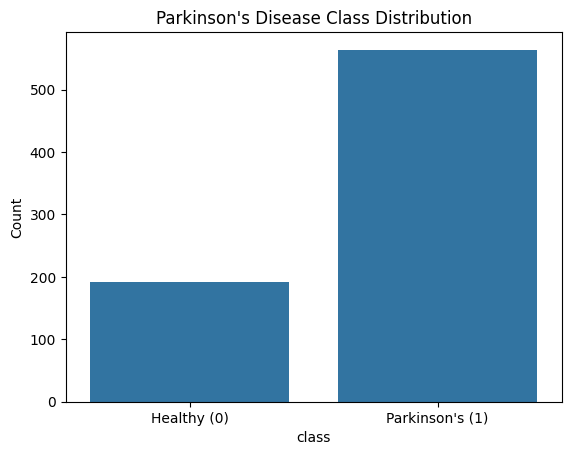

In [11]:
# Visualization of Class Balance
sns.countplot(data=df, x='class')
plt.title("Parkinson's Disease Class Distribution")
plt.xticks([0, 1], ['Healthy (0)', 'Parkinson\'s (1)'])
plt.ylabel("Count")
plt.show()

✅ **Data Preprocessing**

In [12]:
# Check and handle missing values
missing = df.isnull().sum().sum()
print(f"Total missing values: {missing}")

Total missing values: 0


In [13]:
# Dropping 'id' column as not useful for prediction
if 'id' in df.columns:
    df = df.drop(columns='id')

In [14]:
# Defining features and target
X = df.drop(columns='class')
y = df['class']

In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Check class distribution
print("\nClass distribution before SMOTE:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new distribution
print("\nClass distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
 class
1    564
0    192
Name: count, dtype: int64

Class distribution after SMOTE:
 class
1    564
0    564
Name: count, dtype: int64


✅ **Train-Test Split (80%-20%)**

In [17]:
# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (902, 753)
Test set size: (226, 753)


✅ **Exploratory Data Analysis (EDA) of the Parkinson's Disease dataset:**

In [18]:
# Selecting key voice features for visualization
selected_features = ['PPE', 'RPDE', 'DFA', 'meanPeriodPulses', 'locPctJitter']

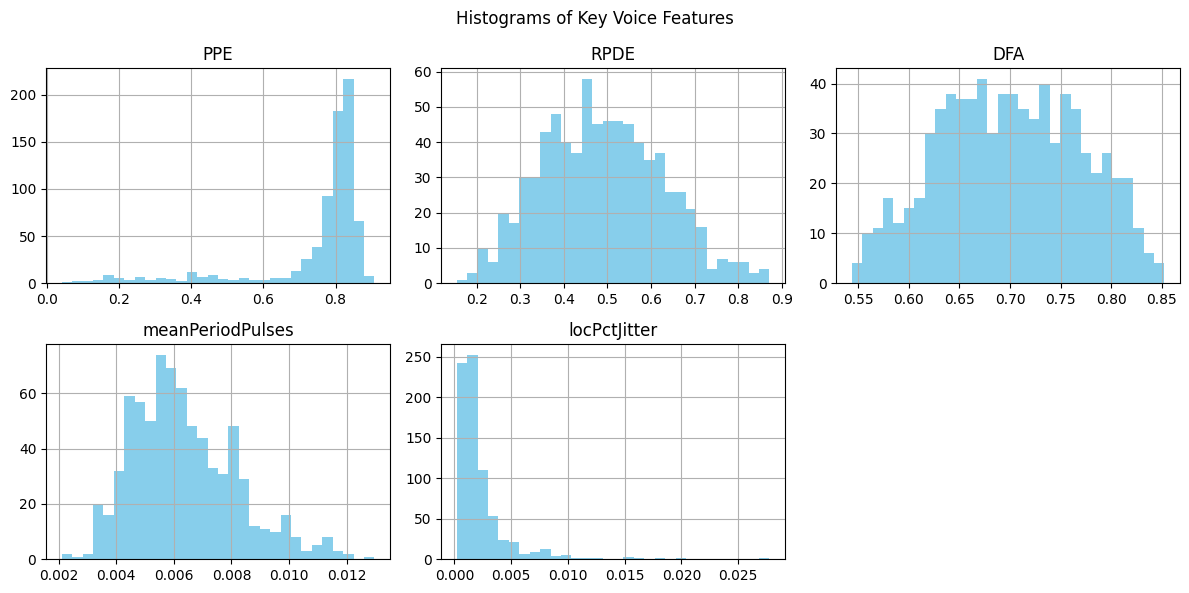

In [19]:
# Histograms
df[selected_features].hist(bins=30, figsize=(12, 6), layout=(2, 3), color='skyblue')
plt.suptitle("Histograms of Key Voice Features")
plt.tight_layout()
plt.show()

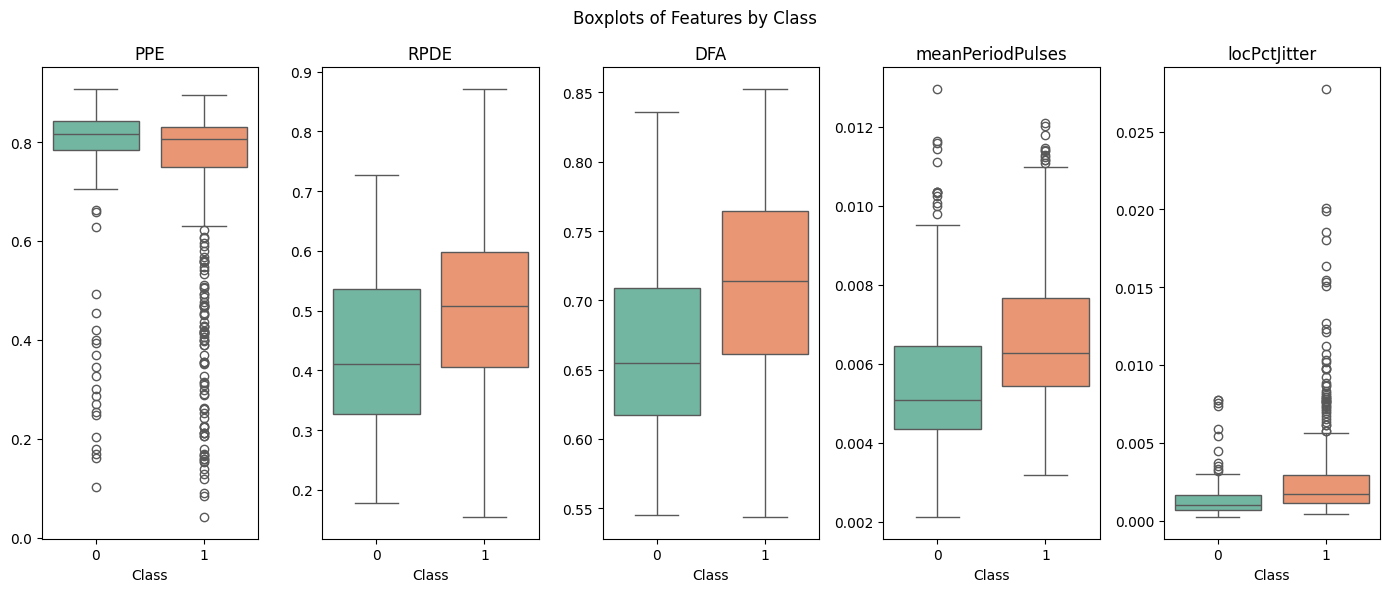

In [20]:
# Boxplots
plt.figure(figsize=(14, 6))
for i, col in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.boxplot(data=df, y=col, x='class', palette='Set2')
    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel('')
plt.suptitle("Boxplots of Features by Class")
plt.tight_layout()
plt.show()

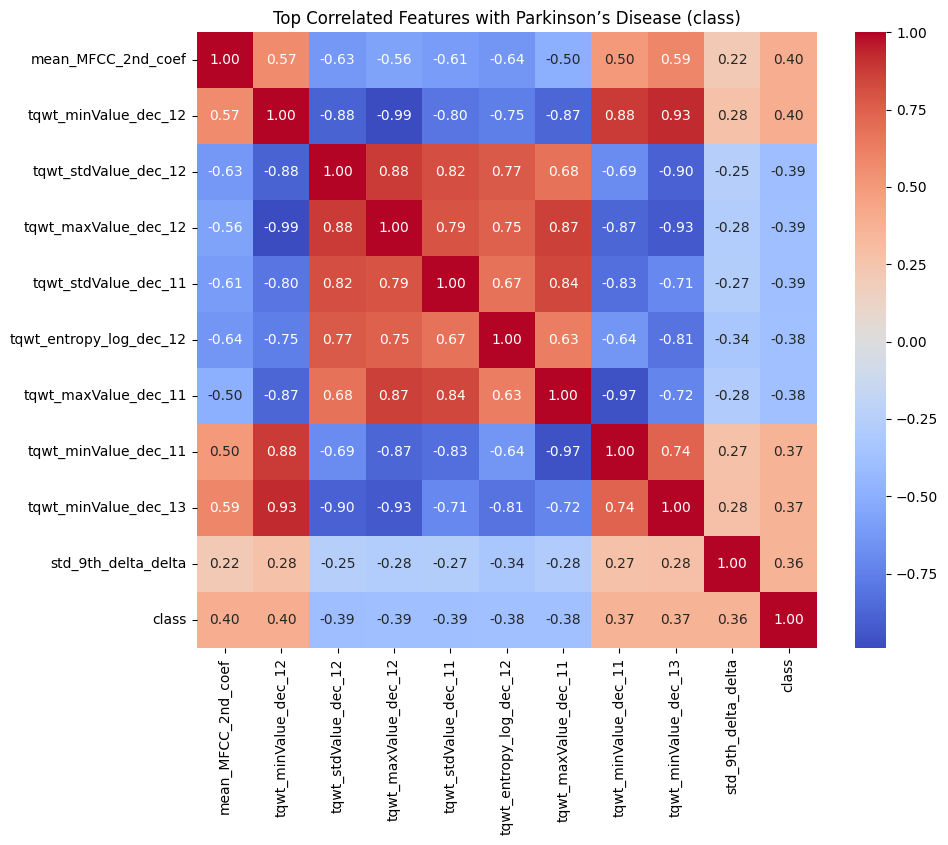

In [21]:
# Compute correlation matrix
corr_matrix = df.corr()

# Correlation with target
corr_with_target = corr_matrix['class'].abs().sort_values(ascending=False)

# Top 10 most correlated features with target
top_corr_features = corr_with_target[1:11].index.tolist()

# Heatmap of top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features + ['class']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with Parkinson’s Disease (class)")
plt.show()

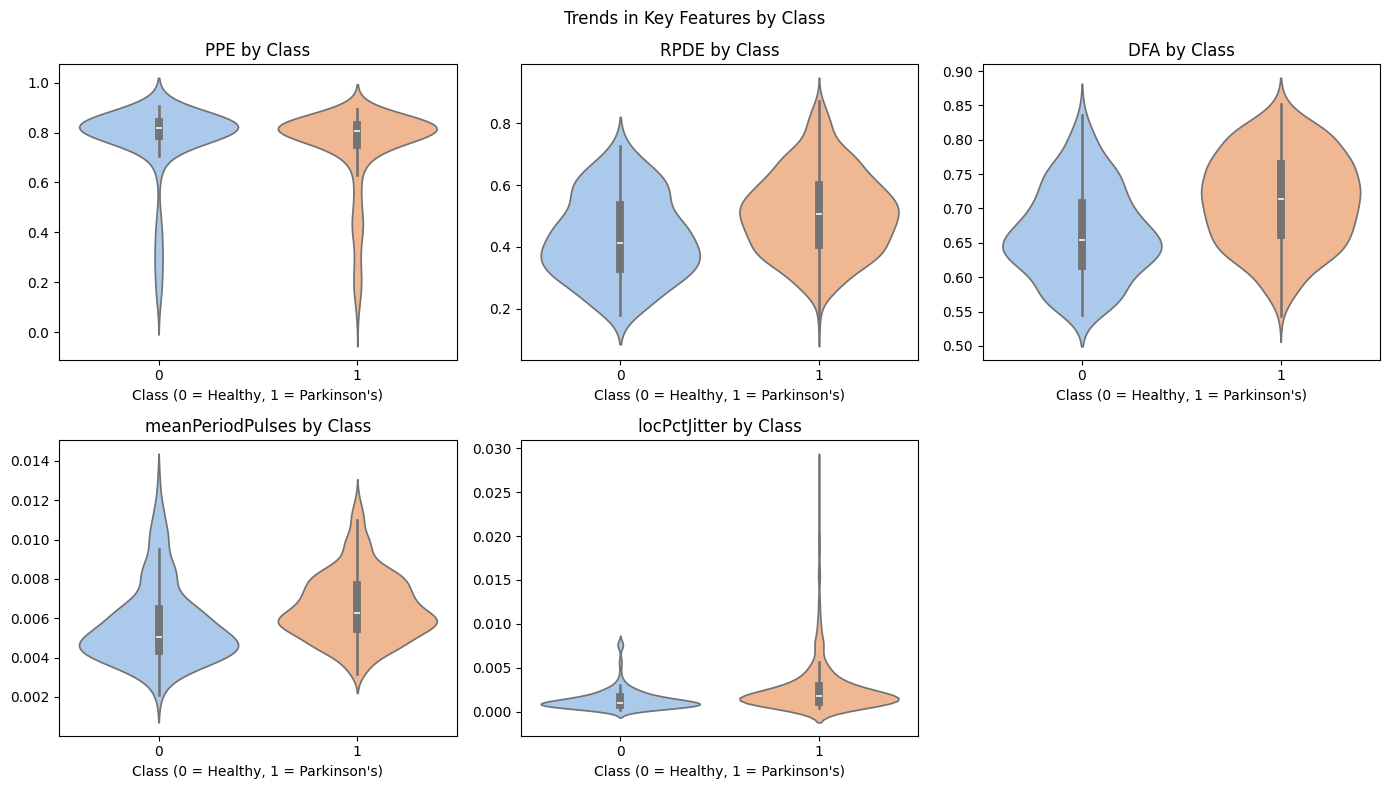

In [22]:
# To Identify Trends in Features by Class

# Violin plots for feature trends
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x='class', y=feature, palette='pastel')
    plt.title(f'{feature} by Class')
    plt.xlabel("Class (0 = Healthy, 1 = Parkinson's)")
    plt.ylabel('')
plt.suptitle("Trends in Key Features by Class")
plt.tight_layout()
plt.show()

✅ **Model Training and Selection**

In [23]:
# Import Model Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [24]:
# Defining Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

✅ **To Train & Evaluate Models**

In [26]:
# Initialize an empty list to store metric rows
metrics_list = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       113
           1       0.97      0.91      0.94       113

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       113
           1       0.95      0.93      0.94       113

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       113
           1       0.94      0.97      0.96       113

    accuracy                           0.96       226
   

✅ **Comparing Model Performance**


=== Model Performance Comparison ===
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9425     0.9717  0.9115    0.9406
1        Random Forest    0.9425     0.9545  0.9292    0.9417
2                  SVM    0.9558     0.9402  0.9735    0.9565
3              XGBoost    0.9779     0.9909  0.9646    0.9776


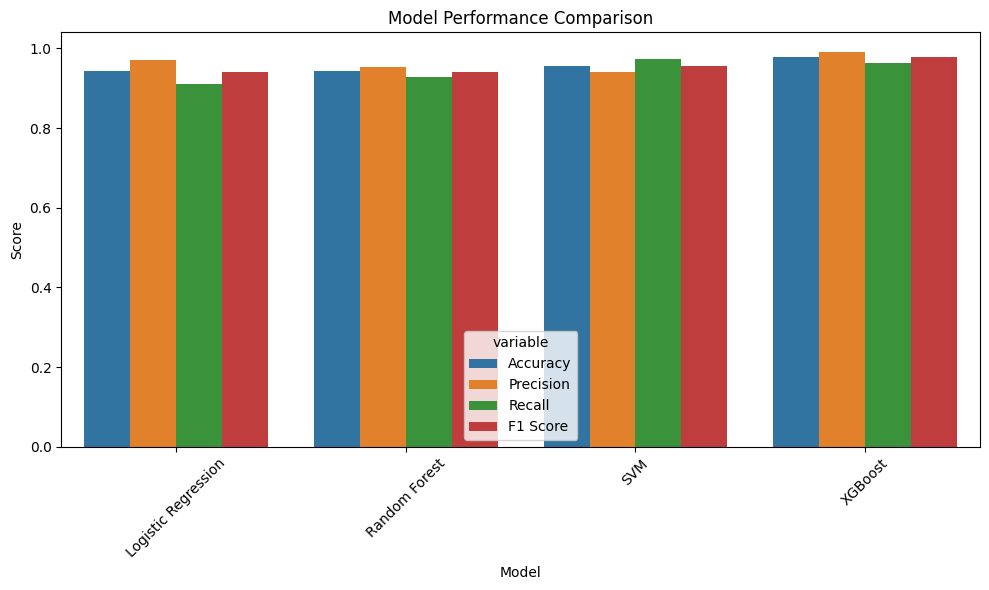

In [27]:
# Round metrics for clarity
metrics_df = metrics_df.round(4)

# Display metrics
print("\n=== Model Performance Comparison ===")
print(metrics_df)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ **Model Evaluation and Prediction**

✅ ***To Identify the Best Model Based on F1-Score***

In [28]:
# Sort the models by F1 Score and select the best one
best_model_name = metrics_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
print(f"✅ Best Model Based on F1 Score: {best_model_name}")

best_model = models[best_model_name]

✅ Best Model Based on F1 Score: XGBoost


📌 **Best Model Based on F1 Score is XGBoost** 📌

✅ **Evaluation with ROC-AUC Curve**

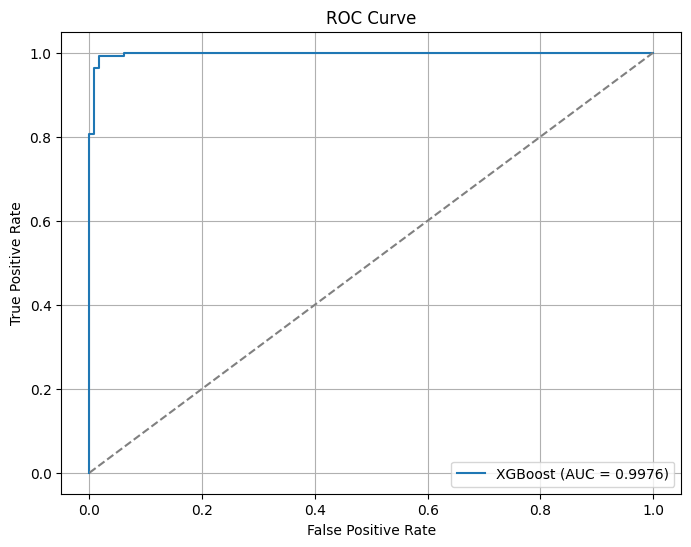

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

✅ **To Predict Parkinson’s for New Patient Data**

In [32]:
# Example new patient data (replace with real input)
# Format: a 2D list/array matching number and order of features in X

# Select one sample (replace this with real patient data input)
new_data_raw = df.drop(columns=['class']).iloc[0:1]

# Scale using the same scaler used during training
new_data_scaled = scaler.transform(new_data_raw)

# Predict
prediction = best_model.predict(new_data_scaled)
probability = best_model.predict_proba(new_data_scaled)[0][1]

# Output result
label = "Parkinson's Disease" if prediction[0] == 1 else "Healthy"
print(f"\nPrediction: {label}")
print(f"Prediction Probability of Disease: {probability:.4f}")


Prediction: Parkinson's Disease
Prediction Probability of Disease: 0.9980
